# Ranking

Ranking Evaluation form query `document:functional`

In [1]:
expect_rank = [
    {"lang": "Haskell",      "rank": 1},
    {"lang": "Elixir",       "rank": 2},
    {"lang": "Scala",        "rank": 3},
    {"lang": "R",            "rank": 4},
    {"lang": "Rust",         "rank": 5},
    {"lang": "Python",       "rank": 6},
    {"lang": "TypeScript",   "rank": 7},
    {"lang": "JavaScript",   "rank": 8},
    {"lang": "Kotlin",       "rank": 9},
    {"lang": "Swift",        "rank": 10},
    {"lang": "Lua",          "rank": 11},
    {"lang": "Ruby",         "rank": 12},
    {"lang": "Apache Groovy", "rank": 13},
]

# Neue Testfallstruktur mit Unterscheidung für Standard/DisMax
lang_rankings = [
    {
        "query": "functional",  # Suchbegriff ohne Feldspezifikation für DisMax
        "field": "document",    # Feld für DisMax/eDisMax
        "standard_query": "document:functional",  # Komplette Abfrage für Standard-Parser
        "expected_langs": expect_rank
    },
    {
        "query": "functional",
        "field": "document", 
        "filter_query": "-document:\"object-oriented\"",  # Filterung für DisMax
        "standard_query": "document:\"functional\" AND NOT document:\"object-oriented\"",
        "expected_langs": expect_rank
    },
    # Weitere vereinfachte Testfälle hier...
    {
        "query": "functional programming",
        "field": "document",
        "boost": 20,  # Boost-Faktor für DisMax
        "standard_query": "document:\"functional programming\"^20",
        "expected_langs": expect_rank
    },
    {
        "query": "purely functional",
        "field": "document",
        "standard_query": 'document:\"purely functional\"',
        "expected_langs": expect_rank
    }
]

param_configs = [
    {
        "name": "Standard (Baseline)",
        "params": {}
    },
    {
        "name": "DisMax Basic",
        "params": {"defType": "dismax",
                   "qf": "document paradigm title"
                   }
    },
    {
        "name": "EDisMax Basic",
        "params": {"defType": "edismax", 
                   "qf": "document paradigm title"}
    },
    {
        "name": "EDisMax mit Paradigm-Boost",
        "params": {
            "defType": "edismax",
            "qf": "paradigm^10 document^3 title^5"
        }
    },
    {
        "name": "EDisMax mit Phrase-Boost",
        "params": {
            "defType": "edismax",
            "qf": "paradigm^10 document^3 title^5",
            "pf": "paradigm^20"
        }
    },
    {
        "name": "EDisMax mit Phrase-Boost und Tie",
        "params": {
            "defType": "edismax",
            "qf": "paradigm^10 document^3 title^5",
            "pf": "paradigm^20",
            "tie": "0.3"
        }
    },
    {
        "name": "EDisMax mit Boost Query",
        "params": {
            "defType": "edismax",
            "qf": "paradigm^10 document^3",
            "bq": "paradigm:functional^5"
        }
    },
    {
        "name": "EDisMax mit MM 100%",
        "params": {
            "defType": "edismax",
            "qf": "paradigm^10 document^3",
            "mm": "100%"
        }
    }
]

# lang_rankings = [
#     {
#         "name": "document:functional",
#         "expected_langs": expect_rank
#     },
#     {
#         "name": "document:\"functional\" AND NOT document:\"object-oriented\"",
#         "expected_langs": expect_rank
#     },
#     {
#         "name": "document:\"functional\"^50 AND NOT document:\"object-oriented\"",
#         "expected_langs": expect_rank
#     },
#     {
#         "name": "document:\"functional\" AND NOT document:\"function\"",
#         "expected_langs": expect_rank
#     },
#     {
#         "name": "document:\"functional\" AND NOT document:\"methode\"",
#         "expected_langs": expect_rank
#     },
#     {
#         "name": "document:\"functional\"^50 AND NOT document:\"function\"",
#         "expected_langs": expect_rank
#     },
#     {
#         "name": "paradigm:functional",
#         "expected_langs": expect_rank
#     },
#     {
#         "name": "paradigm:\"functional\" AND NOT paradigm:\"object-oriented\"",
#         "expected_langs": expect_rank
#     },
#     {
#         "name": "document:\"functional\"~3",
#         "expected_langs": expect_rank
#     },
#     {
#         "name": "document:\"functional programming\"^20",
#         "expected_langs": expect_rank
#     },
#     {
#         "name": "document:(functional OR declarative) AND NOT document:\"object-oriented\"",
#         "expected_langs": expect_rank
#     },
#     {
#         "name": 'document:\"purely functional\"',
#         "expected_langs": expect_rank
#     },
#     {
#         "name": "document:\"purely functional\" AND document:\"higher-order\"",
#         "expected_langs": expect_rank
#     },
#     {
#         "name": "document:\"functional\" AND document:\"stateless\" AND NOT document:\"class-based\"",
#         "expected_langs": expect_rank
#     },
#     {
#         "name": 'document:\"functional\" AND document:"stateless" AND NOT document:\"class-based\"',
#         "expected_langs": expect_rank
#     }
# ]

# param_configs = [
#     {
#         "name": "Standard (Baseline)",
#         "params": {}
#     },
#     {
#         "name": "DisMax Basic",
#         "params": {"defType": "dismax",
#                    "qf": "document paradigm title"
#                    }
#     },
#     {
#         "name": "EDisMax Basic",
#         "params": {"defType": "edismax", 
#                    "qf": "document paradigm title"}
#     },
#     {
#         "name": "EDisMax mit Paradigm-Boost",
#         "params": {
#             "defType": "edismax",
#             "qf": "paradigm^10 document^3 title^5"
#         }
#     },
#     {
#         "name": "EDisMax mit Phrase-Boost",
#         "params": {
#             "defType": "edismax",
#             "qf": "paradigm^10 document^3 title^5",
#             "pf": "paradigm^20"
#         }
#     },
#     {
#         "name": "EDisMax mit Phrase-Boost und Tie",
#         "params": {
#             "defType": "edismax",
#             "qf": "paradigm^10 document^3 title^5",
#             "pf": "paradigm^20",
#             "tie": "0.3"
#         }
#     },
#     {
#         "name": "EDisMax mit Boost Query",
#         "params": {
#             "defType": "edismax",
#             "qf": "paradigm^10 document^3",
#             "bq": "paradigm:functional^5"
#         }
#     },
#     {
#         "name": "EDisMax mit MM 100%",
#         "params": {
#             "defType": "edismax",
#             "qf": "paradigm^10 document^3",
#             "mm": "100%"
#         }
#     }
# ]

In [2]:
from core import evaluate_case, EvaluationResult
import json
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy

# Beispiel: core und Konfiguration
cores = ["ProgLang24_4"]

all_results = []

# Für jede Parameter-Konfiguration durchführen
for config in param_configs:
    results = []
    print(f"\n\n=== Evaluierung mit {config['name']} ===\n")
    
    for core in cores:
        solr_url = f'http://10.248.16.116:8983/solr/{core}/select'
        for case in lang_rankings:
            query_display = case.get('query') if config['params'].get('defType') else case.get('standard_query')
            print(f"Evaluating case: {query_display} on core: {core} with {config['name']}")
            
            # Parameter für diese Evaluation anwenden
            result: EvaluationResult = evaluate_case(case, solr_url, core, **config['params'])
            
            # Hinzufügen von Informationen über die verwendeten Parameter
            result_with_config = deepcopy(result)
            result_with_config["config_name"] = config['name']
            result_with_config["config_params"] = config['params']
            
            results.append(result_with_config)
    
    # Speichern der Ergebnisse für diese Konfiguration
    with open(f"./results/results-ranking-func-{config['name'].replace(' ', '_').lower()}.json", "w", encoding="utf-8") as f:
        json.dump(results, f, ensure_ascii=False, indent=2)
    
    all_results.append({
        "config": config,
        "results": results
    })



=== Evaluierung mit Standard (Baseline) ===

Evaluating case: document:functional on core: ProgLang24_4 with Standard (Baseline)
DEBUG - Sending to Solr: {'rows': 30, 'wt': 'json', 'q': 'document:functional'}
Ranking-Abgleich:
Evaluating case: document:"functional" AND NOT document:"object-oriented" on core: ProgLang24_4 with Standard (Baseline)
DEBUG - Sending to Solr: {'rows': 30, 'wt': 'json', 'q': 'document:"functional" AND NOT document:"object-oriented"'}
Ranking-Abgleich:
Evaluating case: document:"functional programming"^20 on core: ProgLang24_4 with Standard (Baseline)
DEBUG - Sending to Solr: {'rows': 30, 'wt': 'json', 'q': 'document:"functional programming"^20'}
Ranking-Abgleich:
Evaluating case: document:"purely functional" on core: ProgLang24_4 with Standard (Baseline)
DEBUG - Sending to Solr: {'rows': 30, 'wt': 'json', 'q': 'document:"purely functional"'}
Ranking-Abgleich:


=== Evaluierung mit DisMax Basic ===

Evaluating case: functional on core: ProgLang24_4 with DisM

In [3]:
test_config = {"defType": "edismax", "qf": "paradigm^10 document^3"}
test_case = {"name": "functional", "expected_langs": expect_rank}  # Keine Feldangabe!
result = evaluate_case(test_case, solr_url, core, **test_config)
print(f"Test Case Result: {result}")

DEBUG - Sending to Solr: {'rows': 30, 'wt': 'json', 'q': '', 'defType': 'edismax', 'qf': 'paradigm^10 document^3'}
Ranking-Abgleich:
Test Case Result: {'core': 'ProgLang24_4', 'name': '', 'tp': 0, 'fp': 0, 'fn': 13, 's1_pre': 0, 's1_rec': 0.0, 's1_f1': 0, 'found_langs': [], 'expected_langs': ['Scala', 'Python', 'R', 'Kotlin', 'Swift', 'Rust', 'Ruby', 'Apache Groovy', 'TypeScript', 'Lua', 'JavaScript', 'Elixir', 'Haskell'], 'ranking': [{'lang': 'Haskell', 'expected_rank': 1, 'actual_rank': None}, {'lang': 'Elixir', 'expected_rank': 2, 'actual_rank': None}, {'lang': 'Scala', 'expected_rank': 3, 'actual_rank': None}, {'lang': 'R', 'expected_rank': 4, 'actual_rank': None}, {'lang': 'Rust', 'expected_rank': 5, 'actual_rank': None}, {'lang': 'Python', 'expected_rank': 6, 'actual_rank': None}, {'lang': 'TypeScript', 'expected_rank': 7, 'actual_rank': None}, {'lang': 'JavaScript', 'expected_rank': 8, 'actual_rank': None}, {'lang': 'Kotlin', 'expected_rank': 9, 'actual_rank': None}, {'lang': 'S

In [4]:
import json

with open("./resutls/results-ranking-func.json", "w", encoding="utf-8") as f:
    json.dump(results, f, ensure_ascii=False, indent=2)

FileNotFoundError: [Errno 2] No such file or directory: './resutls/results-ranking-func.json'

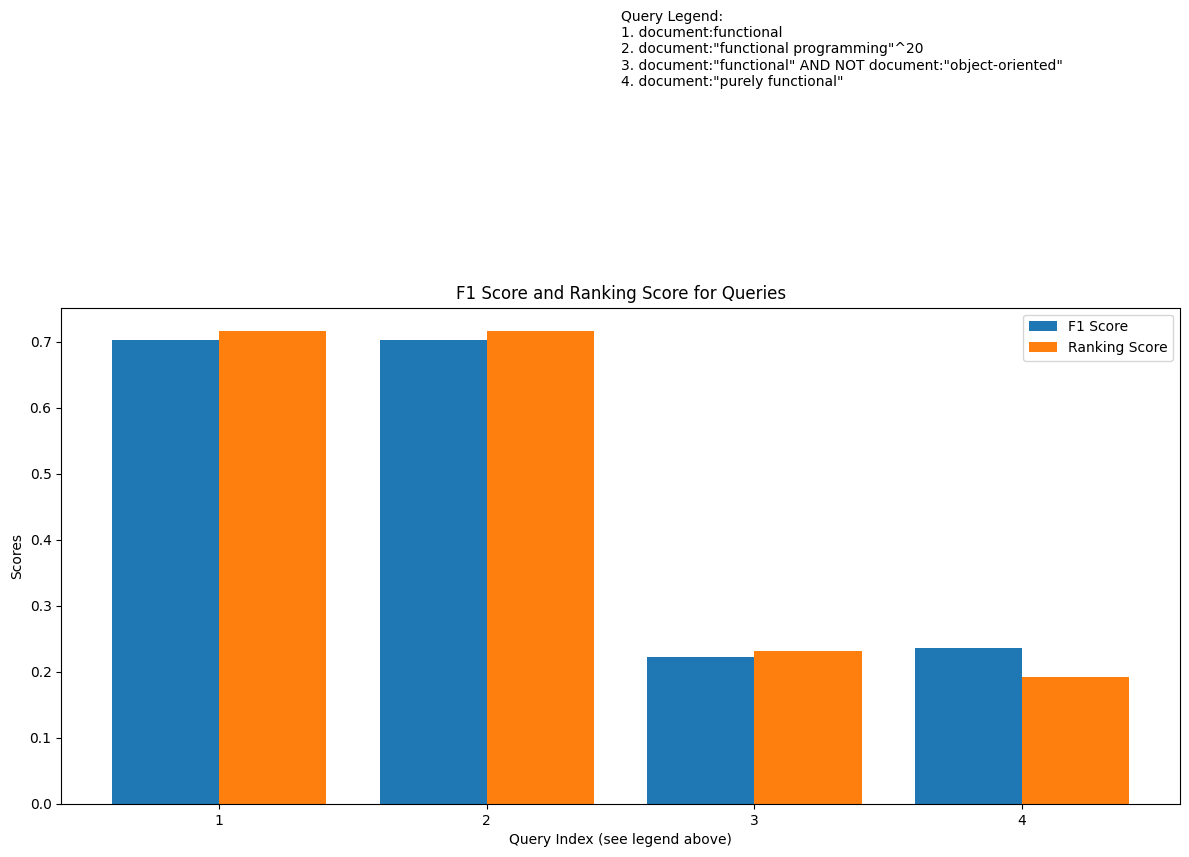

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Sort by ranking score (descending)
sorted_results = sorted(results, key=lambda r: r["ranking_score"], reverse=True)

names = [r["name"] for r in sorted_results]
f1_scores = [r["s1_f1"] for r in sorted_results]
ranking_scores = [r["ranking_score"] for r in sorted_results]

x = np.arange(len(names))
width = 0.4

plt.figure(figsize=(12, 13))  # Increase figure height to create more space

# Add a legend above the plot with all queries
query_legend = "\n".join([f"{i+1}. {name}" for i, name in enumerate(names)])
plt.text(0.5, 1.6, f"Query Legend:\n{query_legend}", fontsize=10, ha="left", va="top", transform=plt.gca().transAxes)

# Plot the F1 and ranking scores
plt.bar(x - width/2, f1_scores, width, label="F1 Score")
plt.bar(x + width/2, ranking_scores, width, label="Ranking Score")

plt.xticks(x, [f"{i+1}" for i in range(len(names))], rotation=0, ha="center")  # Reference queries by index
plt.xlabel("Query Index (see legend above)")
plt.ylabel("Scores")
plt.title("F1 Score and Ranking Score for Queries")
plt.legend()
plt.tight_layout(rect=[0, 0, 1, 0.9])  # Adjust layout to prevent overlap
plt.show()